In [2]:
import google.generativeai as genai
import os
from dotenv import load_dotenv
import PIL.Image
import json
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
load_dotenv()
genai.configure(api_key=os.getenv("API_KEY"))
model = genai.GenerativeModel('gemini-2.0-flash')

In [ ]:
# Small Test to check is everything working fine
print("Test request to Gemini")

try:
    response = model.generate_content("Who is the best, Messi or Ronaldo? You only have to say one.")
    
    print("Gemini reponse: ",response.text)
    
except Exception as e:
    print(f"error {e}")



Test request to Gemini
Gemini reponse:  Messi



In [ ]:
# Prompt and Image path
#image_path = '../images/graph_test.jpg'
image_path = '../images/graph_1.jpg'
prompt = """
Analyze the graph in the image.
Return the adjacency list as a JSON object.
Rules:
- Keys are node labels, values are lists of neighbors.
- Format FOR EXAMPLE: {"A": ["B", "C"], "B": ["A"]}
- IMPORTANT: Return ONLY the raw JSON string.
- NO markdown formatting (do not use ```json).
- NO introduction or explanation.
"""

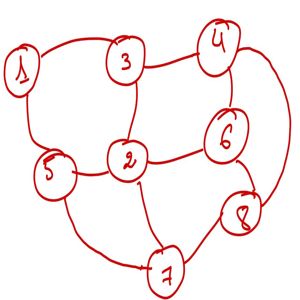

Adj list: {"1": ["3", "5"], "3": ["1", "2", "4"], "5": ["1", "2", "7"], "2": ["3", "5", "6", "7"], "7": ["5", "2", "8"], "4": ["3", "6", "8"], "6": ["4", "2", "8"], "8": ["4", "6", "7"]}


In [18]:
try:
    img = PIL.Image.open(image_path)
    
    
    display(img.resize((300, 300)))
    
except Exception as e:
    print(f" Image not found at this path '{image_path}'")
    print(e)



    
response = model.generate_content([prompt, img])
    
print("Adj list:", response.text)

In [23]:
raw_text = response.text
# to ensure JSON is clean
clean_json_reponse = raw_text.replace("```json", "").replace("```", "").strip() 
graph_data = json.loads(clean_json_reponse)

print("adjacency list: ", graph_data)
print("Typ:", type(graph_data))

adjacency list:  {'1': ['3', '5'], '3': ['1', '2', '4'], '5': ['1', '2', '7'], '2': ['3', '5', '6', '7'], '7': ['5', '2', '8'], '4': ['3', '6', '8'], '6': ['4', '2', '8'], '8': ['4', '6', '7']}
Typ: <class 'dict'>


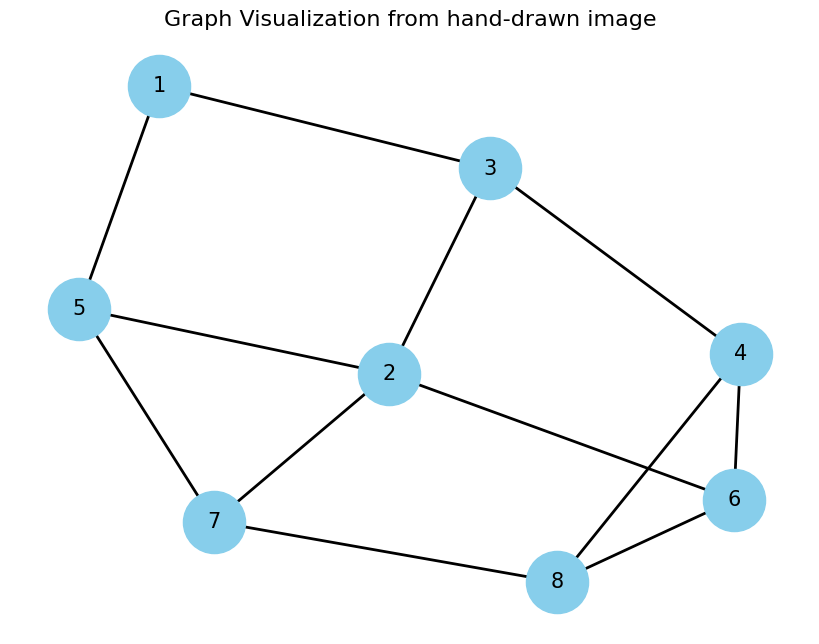

In [28]:
# Graph visualization
G = nx.Graph(graph_data)

plt.figure(figsize=(8, 6))

pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='black', width=2 ,node_size=2000, font_size=15)

plt.title("Graph Visualization from hand-drawn image", fontsize=16)
plt.show()

In [31]:
# Find the minimum  number of colors needed to color the graph
coloring_result = nx.coloring.greedy_color(G, strategy='largest_first')
chromatic_num = max(coloring_result.values()) + 1

print("Minimum number of colors needed to color this graph: ", chromatic_num)
print("Coloring result: ", coloring_result)

Minimum number of colors needed to color this graph:  4
Coloring result:  {'2': 0, '3': 1, '5': 1, '7': 2, '4': 0, '6': 1, '8': 3, '1': 0}


In [38]:
# Rainbow color map for coloring the nodes
color_map = plt.colormaps['rainbow'].resampled(chromatic_num)

In [39]:
node_colors = []
for node in G.nodes():
    color_index = coloring_result[node]
    color_value = color_index / chromatic_num
    node_colors.append(color_map(color_index))

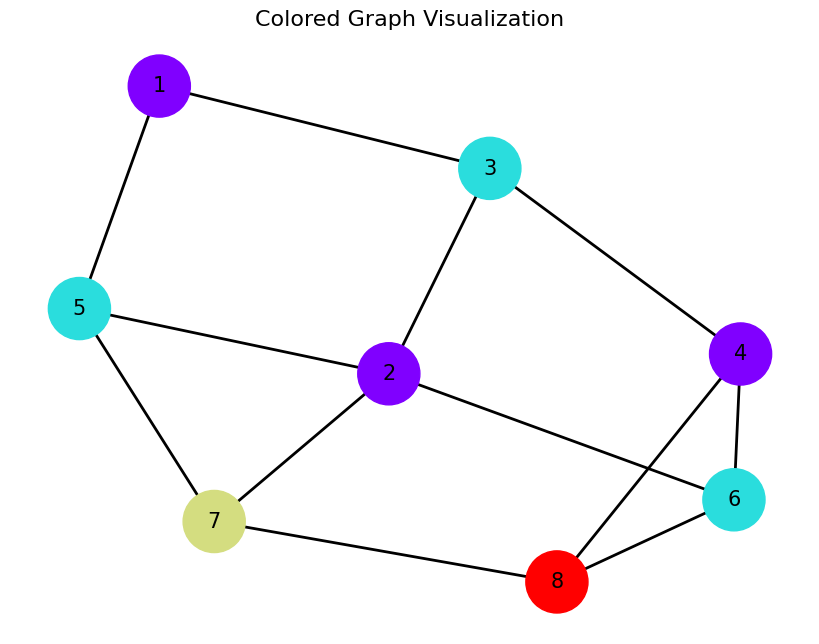

In [40]:
# Plot the colored graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='black', width=2 ,node_size=2000, font_size=15)
plt.title("Colored Graph Visualization", fontsize=16)
plt.show()